Nomor 1

In [ ]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Nomor 1
from google.colab import files
file = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (1).csv


In [ ]:
!pip install --upgrade --force-reinstall xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


In [ ]:
import io
df = pd.read_csv(io.StringIO(file['Churn_Modelling.csv'].decode('utf-8')))

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.duplicated().any()

False

In [ ]:
df[df.duplicated(keep=False)==True]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
#melihat apakah terdapat kolom kosong atau tidak pada dataset
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#melihat tipe data pada dataset
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
#menghapus kolom yang tidak dibutuhkan pada data set
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
numericals = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
categoricals = ['Geography','Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

In [ ]:
df[categoricals].describe()

,HasCrCard,IsActiveMember,Exited
count,10000.00000,10000.000000,10000.000000
mean,0.70550,0.515100,0.203700
std,0.45584,0.499797,0.402769
min,0.00000,0.000000,0.000000
25%,0.00000,0.000000,0.000000
50%,1.00000,1.000000,0.000000
75%,1.00000,1.000000,0.000000
max,1.00000,1.000000,1.000000


pertanyaan
1. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?
2. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
3. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq) 


jawaban 


1.   Semua tipe data yang tersedia pada dataset sudah sesuai 
2.   Pada dataset tidak ada nilai kosong
3.   Dari data set yang tersedia tidak terdapat nilai aneh pada nilai min/mean/median/max/unique/top/freq



Nomor 2

In [ ]:
#Nomor 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
list(enumerate(numericals))

[(0, 'CreditScore'),
 (1, 'Age'),
 (2, 'Tenure'),
 (3, 'Balance'),
 (4, 'NumOfProducts'),
 (5, 'EstimatedSalary')]

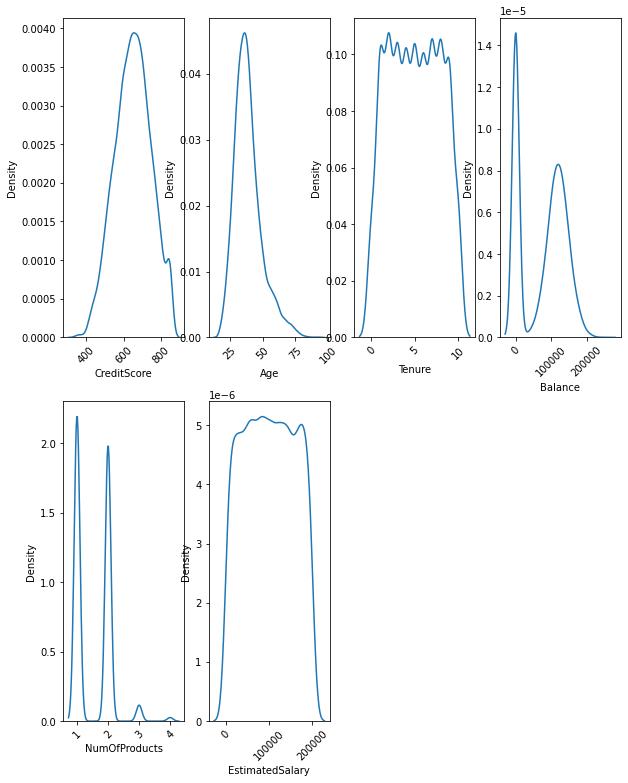

In [ ]:
plt.figure(figsize = (10,20))
for i in enumerate(numericals):
    plt.subplot(3,4,i[0]+1)
    sns.kdeplot(i[1], data=df)
    plt.xticks(rotation=45)

Berdasarkan hasil distribusi diatas: 
- Features EstimatedSalary, CreditScore, dan tenure sudah termasuk kedalam distribusi normal, 
- features age terdistribusi positif karena terdapat ketimpangan usia yaitu dengan nilai usia tertinggi 92 tahun sedangkan rata-rata usia terletak di 32 tahun, untuk menanggulangi hal tersebut di data pre-processing dapat menggunakan normalisasi data
- Features Numofproducts dapat termasuk kedalam categorical yaitu dengan nilai tertinggi yaitu 1 dan 2 yang artinya jumlah produk yang dibeli pelanggan terbanyak yaitu membeli 1 atau 2 produk
- Features balance juga terdistribusi bimodal positif skew karena terdapat juga ketimpangan data dengan nilai 0 mendominasi, untuk menyelesaikan masalah tersebut pada tahapan data pre-processing dapat dilakukannya normalisasi data, standartlisasi data, atau Log transformation 
- Dilihat dari data distribusi tersebut, mayoritas features datanya homogen/runtun

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

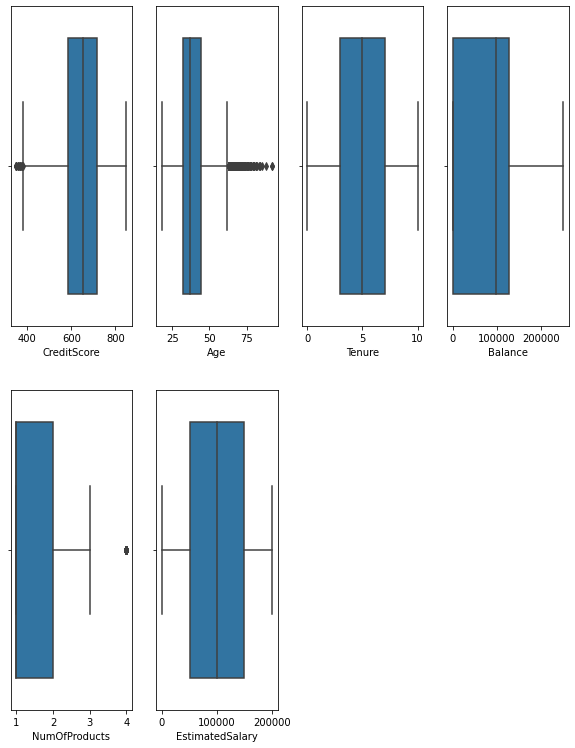

In [ ]:
plt.figure(figsize = (10,20))
for i in enumerate(numericals):
    plt.subplot(3,4,i[0]+1)
    sns.boxplot(i[1], data=df)

- Berdasarkan hasil boxplot diatas dapat disimpulkan bahwa terdapat features yang terdapat outlier yaitu pada features creaditscore, age, dan numofproduct karena terdapat data yang ekstrem kebawah atau keatas untuk menyelesaikan masalah tersebut pada tahapan data pre-processing dapat dilakukannya menghapus oulier berdasarkan IQR atau Z-score
- Features yang akan menjadi perhatian khusus yakni pada features CrediteScore dan Age mengingat jarak outliernya cukup jauh dari rata-ratanya.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

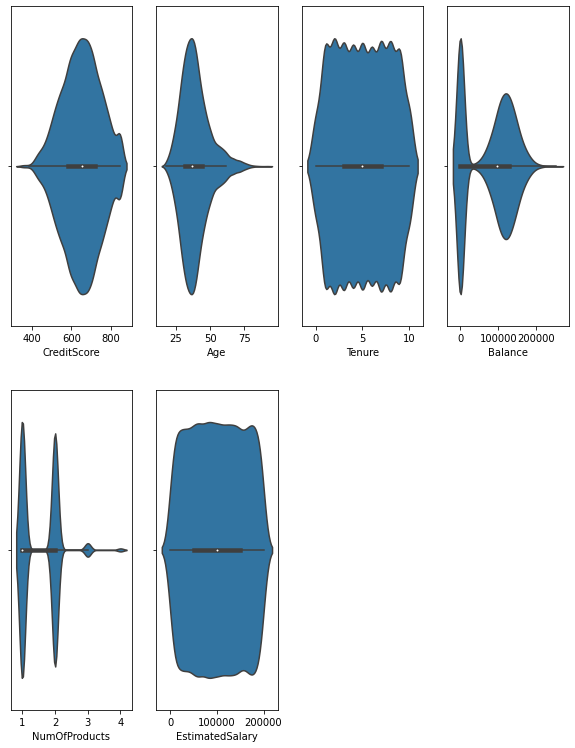

In [ ]:
plt.figure(figsize = (10,20))
for i in enumerate(numericals):
    plt.subplot(3,4,i[0]+1)
    sns.violinplot(i[1], data=df)

Berdasarkan hasil violin plot diatas dapat dilihat apa yang dideskripsikan pada boxplot maupun displot sesuai.

> Indented block



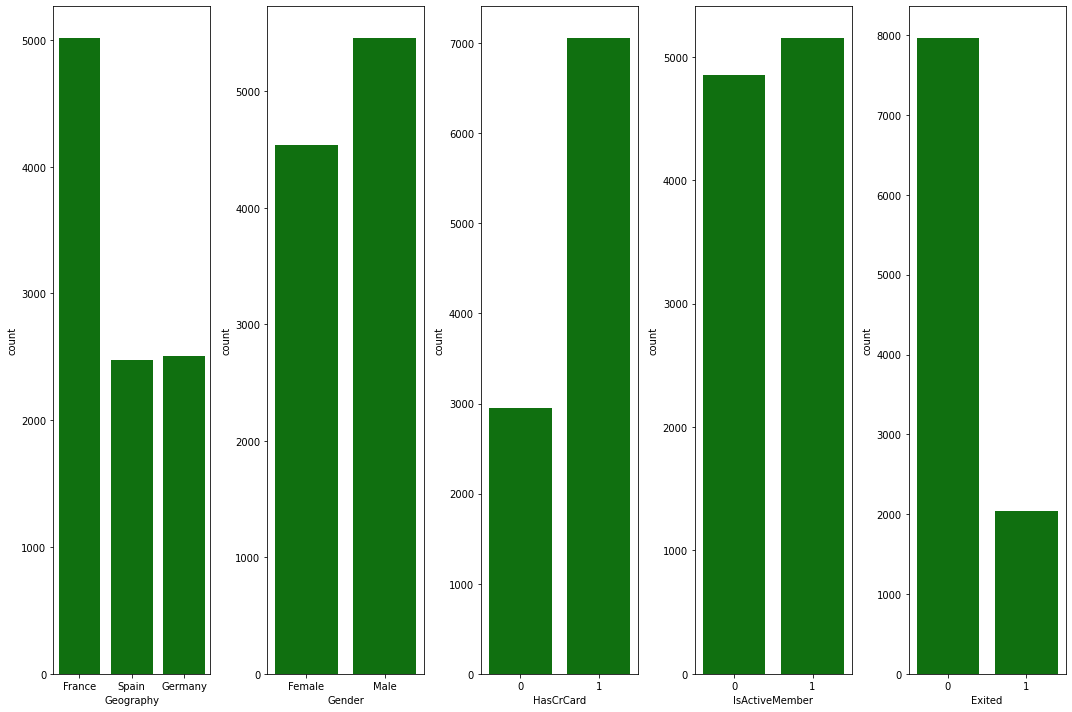

In [ ]:
plt.figure(figsize = (15,10))
for i in range(0, len(categoricals)):
   plt.subplot(1, len(categoricals), i+1)
   sns.countplot(x=df[categoricals[i]], color='green')
   plt.tight_layout()

Berdasarkan hasil countplot 
- Kategori diatas menjelaskan bahwa terdapat ketimpangan jumlah pengguna berdasarkan features geography yaitu jumlah pengguna France lebih banyak dibandingkan spain dan germany.
- Features HasCrCard yang menunjukkan bahwa nasabah yang memiliki kartu kredit lebih banyak dibandingkan dengan yang tidak memiliki kartu kredit.
- Pada features exited, dapat disimpulkan bahwa nasabah pada bank tersebut mayoritas tidak churn dibandingkan dengan yang churn, untuk menyelesaikan masalah tersebut pada tahapan data pre-processing dapat dilakukannya Class imbalance.
- Features gender dan IsActiveMember memiliki nilai yang tidak begitu timpang

Nomor 3

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti:<br>
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana 
saja yang paling relevan dan harus dipertahankan?
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Ap

In [ ]:
#Nomor 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dfx = pd.read_csv("Churn_Modelling.csv")

In [ ]:
dfx.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


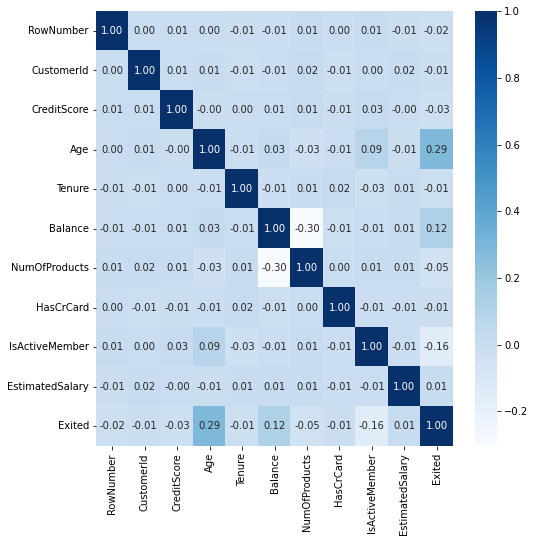

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(dfx.corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
nums = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

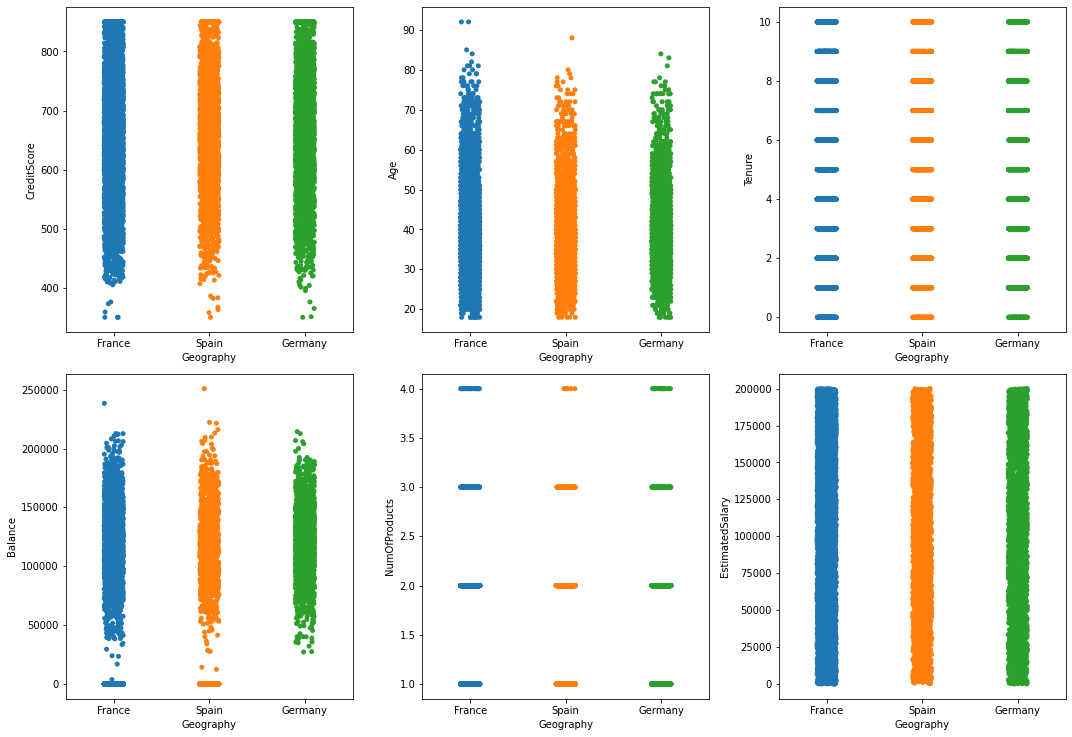

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=dfx, x='Geography', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

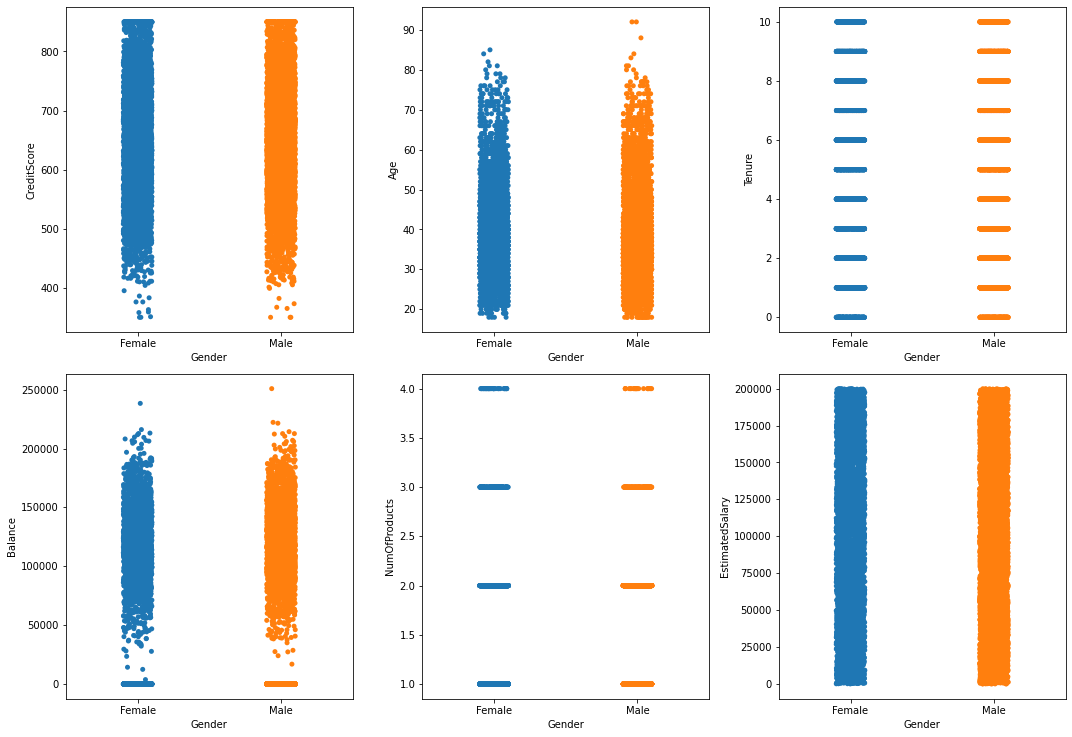

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=dfx, x='Gender', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

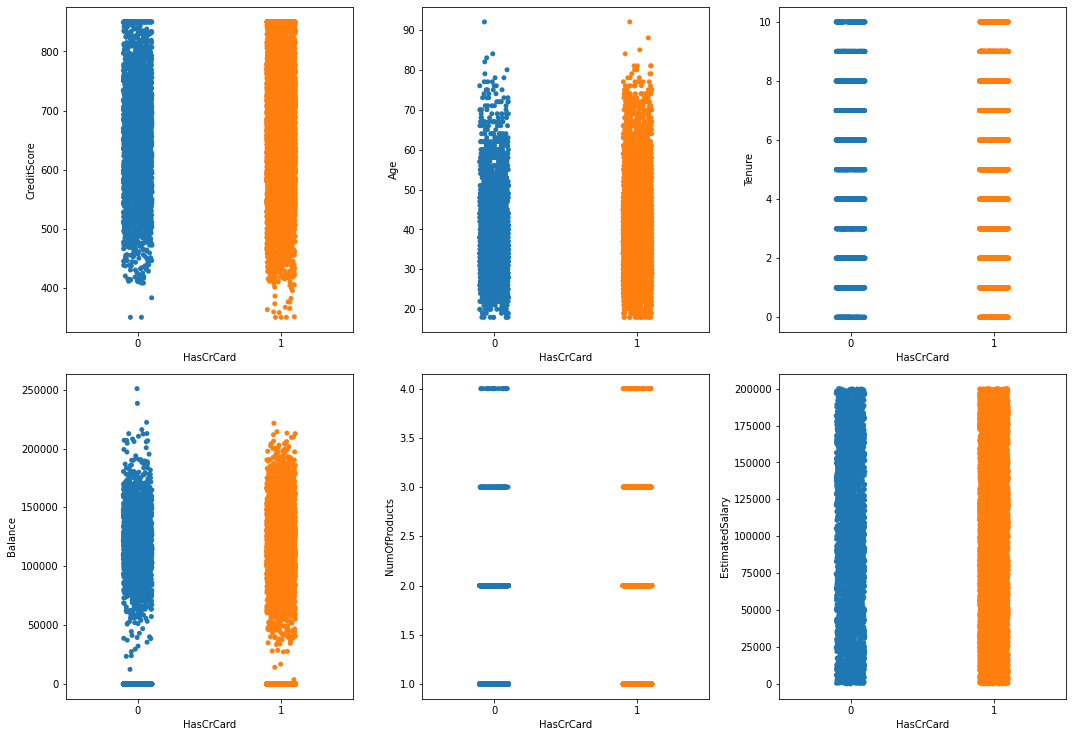

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=dfx, x='HasCrCard', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

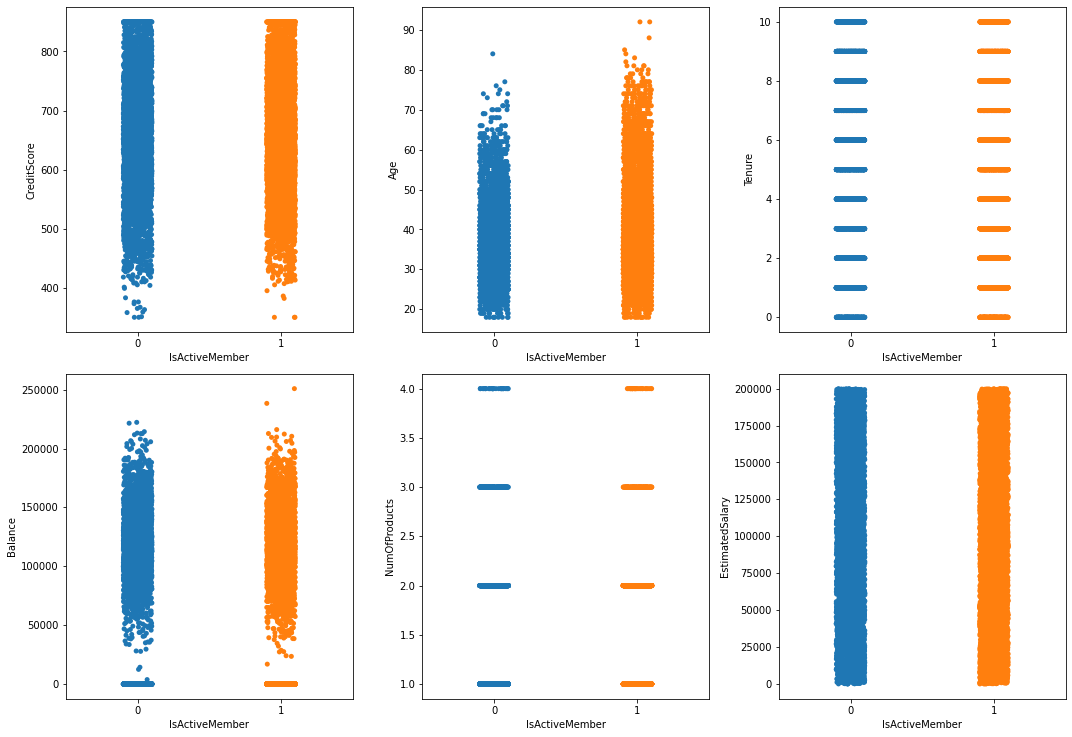

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=dfx, x='IsActiveMember', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

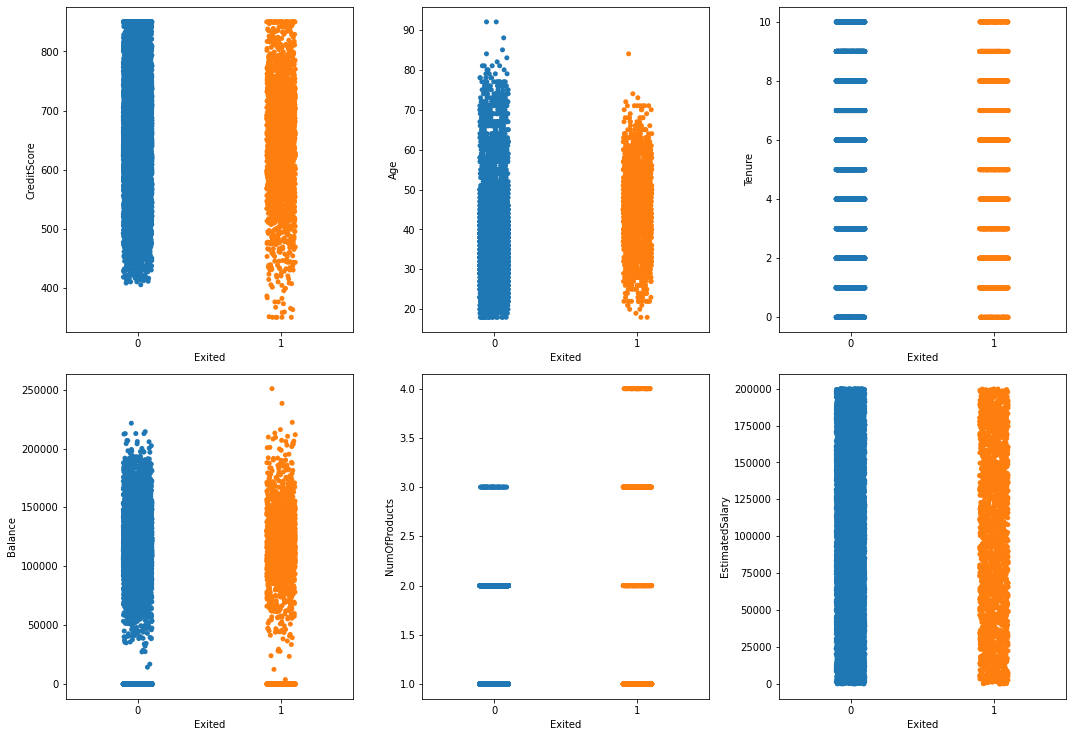

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=dfx, x='Exited', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

In [ ]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


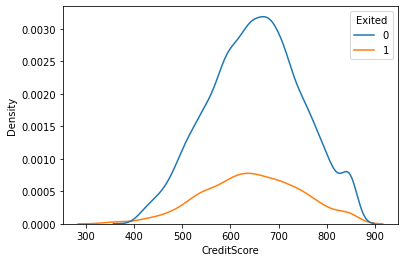

In [ ]:
sns.kdeplot(data=dfx, x="CreditScore", hue="Exited")

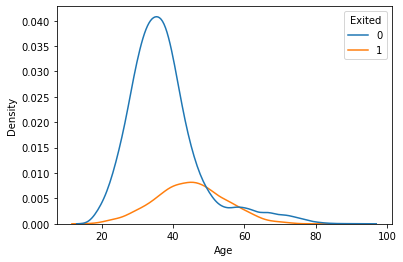

In [ ]:
sns.kdeplot(data=dfx, x="Age", hue="Exited")

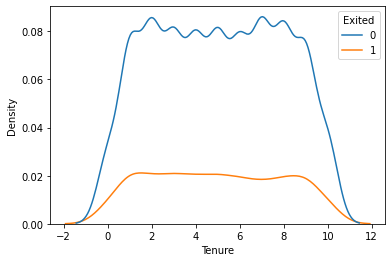

In [ ]:
sns.kdeplot(data=dfx, x="Tenure", hue="Exited")

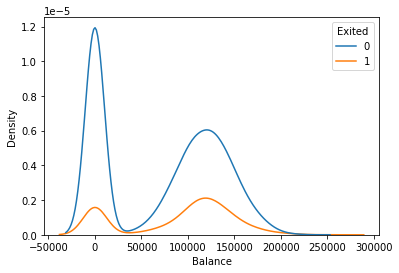

In [ ]:
sns.kdeplot(data=dfx, x="Balance", hue="Exited")

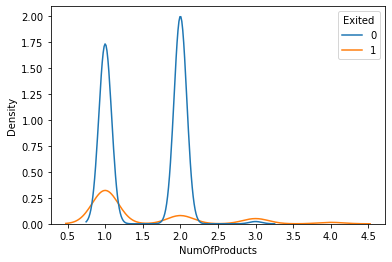

In [ ]:
sns.kdeplot(data=dfx, x="NumOfProducts", hue="Exited")

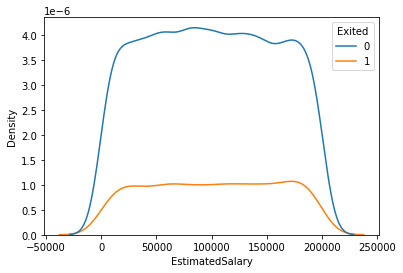

In [ ]:
sns.kdeplot(data=dfx, x="EstimatedSalary", hue="Exited")

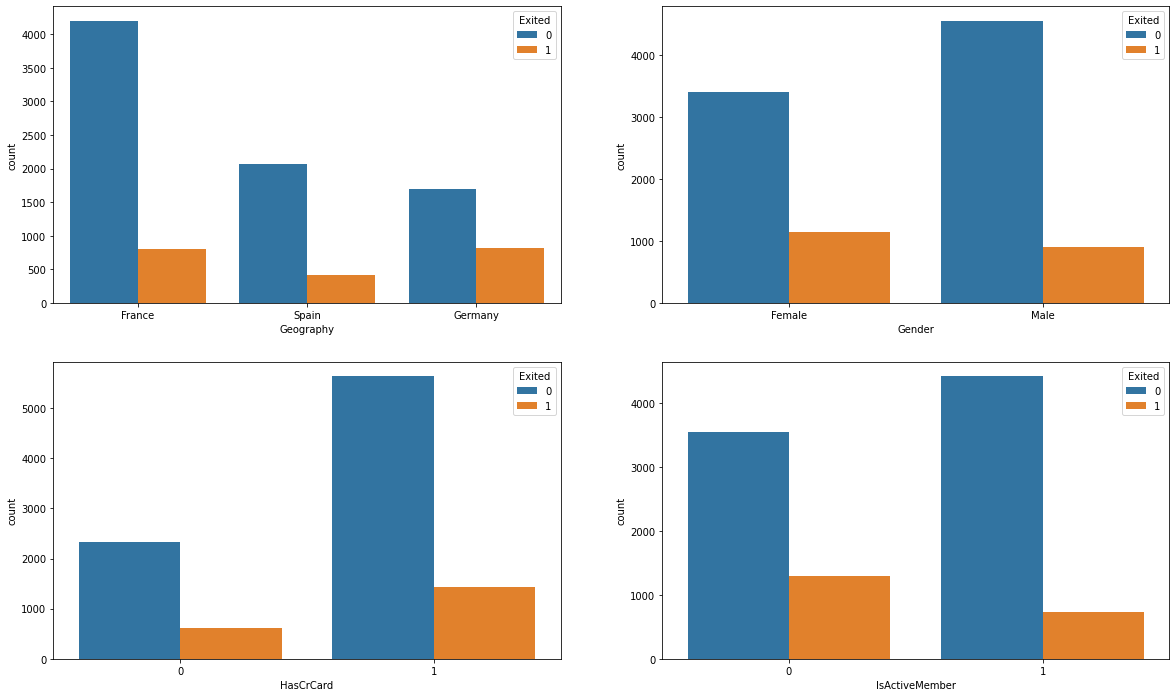

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = dfx, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = dfx, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = dfx, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = dfx, ax=axarr[1][1])

setelah dilakukan multivariate analisis tidak ditemukan hubungan yang signifikan pada mayoritas 
perbandingan feature. dapat dilihat dari heatmap, data yang nilai pengaruhnya paling besar adalah age(umur)
dengan exited(tutup rekening) yang bernilai 0.29 sedangkan rata rata korelasinya tidak lebih dari 0.09<br>di luar terhadap target, nilai korelasi Balance dan Number of Products juga lebih besar dibanding yang lain dan sifatnya berlawanan, namun tidak begitu besar signifikannya dengan nilai -0.30

Nomor 4

Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu
business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan
rekomendasinya untuk bisnis.

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")

Text(0.5, 0, 'Total Nasabah ')

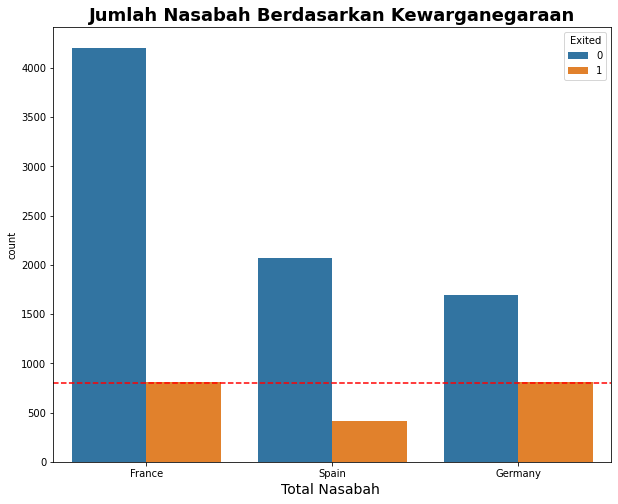

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.axhline(y=800, linestyle='--', color='red')

plt.title('Jumlah Nasabah Berdasarkan Kewarganegaraan', fontsize=18, fontweight='bold')
plt.xlabel('Total Nasabah ', fontsize=14)

Dari visualisasi di atas dapat disimpulkan bahwa negara france dan Germany memiliki tingkat Churn yang sama dan negara Spain adalah negara dengan tingkat churn paling rendah, rekomendasi bisnis yang mungkin dapat di berikan adalah memrikan perlakuan khusu seperti customer engagement atau menawakan keuntungan jakngka panjang seperti membership program kepada France dan Germany

In [ ]:
df['tenure_group'] = np.where(df['Tenure'] > 7, 'High', 
                                             np.where(df['Tenure'] > 4, 'Mid', 'Low'))
df_group = df.groupby(['tenure_group'])['CustomerId'].nunique().reset_index(name='unique_customer')
df_group.sort_values('unique_customer', ascending=False)

,tenure_group,unique_customer
1,Low,4494
2,Mid,3007
0,High,2499


Text(0.5, 1.0, 'Number of Customer by Tenure Group')

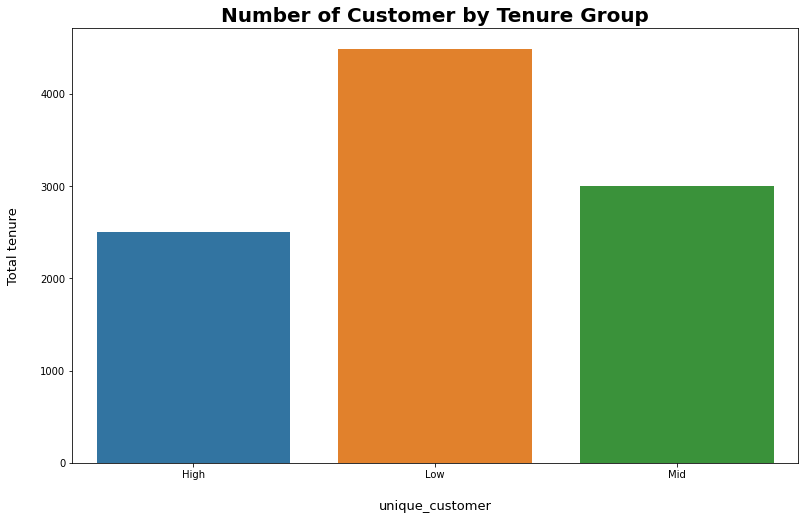

In [ ]:
plt.figure(figsize = (13,8))
sns.barplot(x='tenure_group',
            y='unique_customer',
            data=df_group)

plt.ylabel('Total tenure', fontsize = 13, labelpad = 20)
plt.xlabel('unique_customer', fontsize = 13, labelpad = 20)
plt.title('Number of Customer by Tenure Group',
          fontweight='bold',
          fontsize = 20)

Dari visualisasi di atas dapat disimpulkan bahwa nasabah dengan masa tenure low lebih banyak atau kebanyakan nasabah bank mimiliki tenure kurang dari 4 tahun, rekomendasi bisnis yang mungkin di berikan adlah memberikan riward kepada nasabah dengan masa tenure tertentu agar supaya nasabah tetap bertahan dan tidak jdi churn.

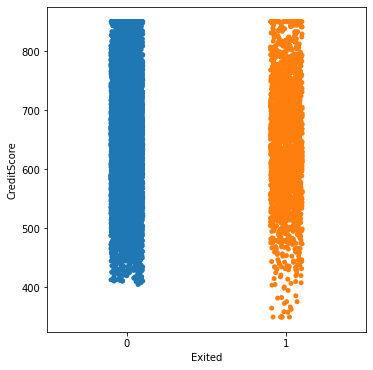

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
sns.stripplot(ax=ax, data=df, x='Exited', y='CreditScore') # gambar catplot/stripplotnya
plt.tight_layout()

Dari visualisasi di atas dapat disimpulkan bahwa nasabah yang memiliki credit score dibawah 400 akan cenderung melakukan churn, oleh karena itu kita dapat memperingati kepada perusahaan jika ada nasabah yang akan hit credit scorenya menjadi 400 kebawah, maka potensi churnnya akan lebih besar. Sehingga pihak bank dapat melakukan tindakan persuasi kepada nasabah tersebut seperti memberikan promo menarik.